In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
# constants
LEFT, RIGHT = -1, 1
NUM_STATES = 19
END_STATES = {0, NUM_STATES + 1}
GAMMA = 1
EPISODES = 10
RUNS = 100

In [8]:
# true value function
V_TRUE = np.arange(-20, 22, 2) / 20.0
V_TRUE[0] = V_TRUE[-1] = 0

In [21]:
# random walk implementation
class MRP:
    def __init__(self, n=NUM_STATES):
        self.n = n
        self.start = (n + 1) // 2

    def reset(self):
        self.state = self.start
        return self.state

    def step(self):
        if np.random.rand() < 0.5: self.state += LEFT
        else: self.state += RIGHT
        
        reward = 0.0
        if self.state in END_STATES: 
            reward = -1.0 if self.state == 0 else 1.0

        return self.state, reward

In [24]:
# n-step temporal difference implementation
def td(mrp, values, n, alpha):
    state = mrp.reset()
    S, R = [state], [0]
    t, T = 0, float('inf')
    while True:
        if t < T:
            next_state, reward = mrp.step()
            S.append(next_state)
            R.append(reward)
            if next_state in END_STATES: T = t + 1
        tau = t - n + 1
        if tau >= 0:
            G = 0.0
            for i in range(tau + 1, min(tau + n, T) + 1):
                G += pow(GAMMA, i - tau - 1) * R[i]
            if tau + n < T:
                G += pow(GAMMA, n) * values[S[tau + n]]
            if S[tau] not in END_STATES:
                values[S[tau]] += alpha * (G - values[S[tau]])
        if tau == T - 1:
            break
        t += 1
        state = next_state
    return values

In [25]:
# generate data
steps = np.power(2, np.arange(0, 10))
alphas = np.arange(0, 1.1, 0.1)
errors = np.zeros((len(steps), len(alphas)))
mrp = MRP(NUM_STATES)

for run in tqdm(range(0, RUNS)):
    for n_i, n in enumerate(steps):
        for a_i, a in enumerate(alphas):
            values = np.zeros(NUM_STATES + 2)
            for ep in range(0, EPISODES):
                values = td(mrp, values, n, a)
                errors[n_i, a_i] += np.sqrt(np.sum(np.power(values - V_TRUE, 2)) / NUM_STATES)

errors /= EPISODES * RUNS

100%|██████████| 100/100 [20:37<00:00, 12.38s/it]


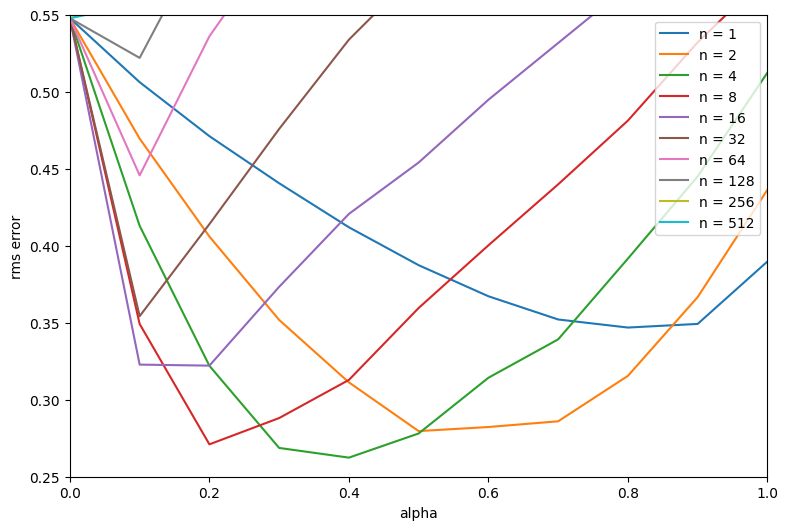

In [29]:
# generate figure
plt.figure(figsize=(9, 6))

for i in range(0, len(steps)):
    plt.plot(alphas, errors[i, :], label=f"n = {steps[i]}")

plt.xlabel('alpha')
plt.xlim([0, 1])
plt.ylabel('rms error')
plt.ylim([0.25, 0.55])
plt.legend(loc='upper right')

plt.show()